# Exercise 5.12: The Stefan-Boltzmann constant

The Planck thoeyr of thermal radiation tells us that in the (angular) frequency interval $\omega$ to $\omega + \text{d}\omega$, a black body of unit area radiates electromagnetically an amount of thermal energy per second equal ot $I(\omega)\text{d}\omega$, where

$$I(\omega) = \frac{\hbar}{4\pi^2c^2}\frac{\omega^3}{(e^{\hbar\omega/k_BT}-1)}$$

Here $\hbar$ is Planck's constant over $2\pi$, $c$ is the speed of light, and $k_B$ is Boltzmann's constant.

a) Show that the total energy per unit area radiated by a black body is

$$ W = \frac{k^4_BT^4}{4\pi^2c^2\hbar^3}\int_0^\infty \frac{x^3}{e^x-1} \text{d}x$$

To go from $I(\omega)$ to $W$ we need to integrate over $\omega$

$$ W = \int_0^\infty I(\omega)\text{d}\omega = \frac{\hbar}{4\pi^2c^2} \int^\infty_0 \frac{\omega^3}{(e^{\hbar\omega/k_BT}-1)}\text{d}\omega$$

subsituting $x = \frac{\hbar\omega}{k_BT}$ and $\text{d}x=\frac{\hbar}{k_BT}\text{d}\omega$

$$ W = \frac{k_B^4T^4}{4\pi^2c^2\hbar^3} \int^\infty_0 \frac{x^3}{(e^{x}-1)}\text{d}x$$

b) Write a program to evaluate the integal in this expression. Explain what method you used, and how accurate you think your answer is.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

C:\Users\jonat\AppData\Local\Temp\ipykernel_17664\1067682673.py:6: RuntimeWarning: invalid value encountered in divide
  return x**3/(np.exp(x)-1)


Text(0, 0.5, 'f(x)')

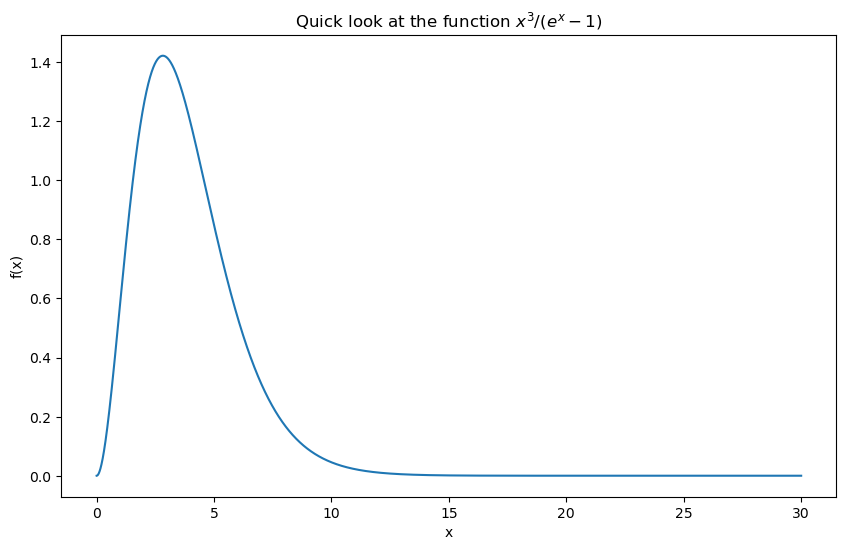

In [2]:
# first let's look at what kind of function it is

x = np.linspace(0, 30, 100000)

def f(x):
    return x**3/(np.exp(x)-1)

y = f(x)

plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.title("Quick look at the function $x^3/(e^x-1)$")
plt.xlabel("x")
plt.ylabel("f(x)")

The function looks to be smooth so we can use romberg integration or gaussian quadrature.

But first we need to substitute the variable to change the integration domain from $0 \rightarrow \infty$ to $0 \rightarrow 1$.

To this end we substitute $x = \frac{z}{1-z}$ and $\text{d}x=\frac{\text{d}z}{(1-z)^2}$

so

$$\int^\infty_0 \frac{x^3}{e^x-1}\text{d}x = \int^1_0 \frac{\text{d}z}{(1-z)^2} \frac{z^3}{(1-z)^3}\frac{1}{e^{z/(1-z)}-1}$$

In [3]:
def f_sub(z):
    return z**3 /(1-z)**5/(np.exp(z/(1-z))-1)

C:\Users\jonat\AppData\Local\Temp\ipykernel_17664\1529274203.py:2: RuntimeWarning: divide by zero encountered in divide
  return z**3 /(1-z)**5/(np.exp(z/(1-z))-1)
C:\Users\jonat\AppData\Local\Temp\ipykernel_17664\1529274203.py:2: RuntimeWarning: invalid value encountered in divide
  return z**3 /(1-z)**5/(np.exp(z/(1-z))-1)


Text(0, 0.5, 'f(z)')

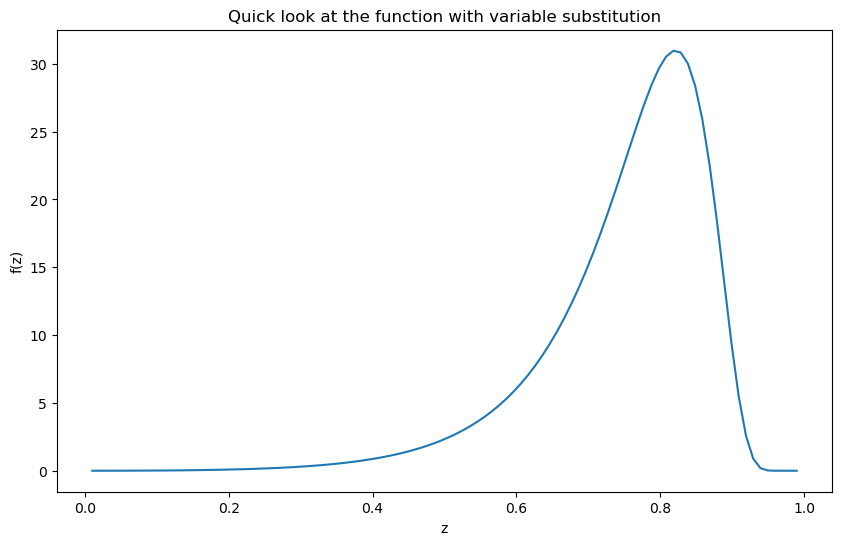

In [4]:
z = np.linspace(0, 1, 100)
y = f_sub(z)

plt.figure(figsize=(10,6))
plt.plot(z, y)
plt.title("Quick look at the function with variable substitution")
plt.xlabel("z")
plt.ylabel("f(z)")

Still looks smooth enough for gaussian quadrature, so we will proceed with a gaussian quadrature approach

In [5]:
from gaussxw import gaussxwab

In [6]:
def gauss_quad(f, a, b, N):
    
    x, w = gaussxwab(N, a, b)
    I = 0
    for k in range(N):
        I += w[k]*f(x[k])
    return I

In [7]:
z = np.linspace(0, 1, 100)

I_50 = gauss_quad(f_sub, z[0], z[-1], 50)
I_100 = gauss_quad(f_sub, z[0], z[-1], 100)
error_50 = I_100-I_50

print(f"By appyling the guassian quadrature we find that the integral has a value of I = {round(I_50,6)},\nwith an found error of {error_10}.")

C:\Users\jonat\AppData\Local\Temp\ipykernel_17664\1529274203.py:2: RuntimeWarning: overflow encountered in exp
  return z**3 /(1-z)**5/(np.exp(z/(1-z))-1)


NameError: name 'error_10' is not defined

c) Even beofre Planck gave his theory of thermal radiation around the turn of the 20th century, it was known that the total energy $W$ given off by a black body per unit area per second followed Stefan's law: $W=\sigma T^4$, where $\sigma$ is the Stefan-Boltzmann constant. Use your value for the integral above to compute a value for the Stefan-Boltzmann constant (in SI units_ to three significant figures. Check your result against the known value, which you can find in books or on-line. You should get good agreement.

From $W= \sigma T^4$ we can find that 

$$\sigma = \frac{k_B^4}{4\pi^2c^2\hbar^3} \int^\infty_0 \frac{x^3}{(e^{x}-1)}\text{d}x$$

We already found the area of the integral so let's take a look at how they compare

In [ ]:
sigma_lit = 5.670374e-8 # W m^-2 K^4
kB = 1.380649e-23 # J/K
c = 299792458  #m/s
hbar = 1.054572e-34 # Js

sigma = kB**4/(4*np.pi**2*c**2*hbar**3)*I_50

print(sigma, sigma_lit)

In [ ]:
print(10**8*(sigma-sigma_lit))

Our found answer agrees with the literature value for the first 5 digits.